Le code suivant est fait pour analyser les images pour detecter des patalogiesrespiratoire : covid, pneumonie bacterienne et virale

Source des image: 

In [7]:
import os,shutil

base_dir =  '/home/tchinda/Python_env_code/venv/traitement _image/Covid_Data_GradientCrescent/all'

#repertoire contenant les données d'entrainement et de test

train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')

# Dictionnaire regroupant les répertoires et leur nom associé
dirs = {
    'train_covid_dir': os.path.join(train_dir, 'covid'),
    'train_normal_dir': os.path.join(train_dir, 'normal'),
    'train_pneumonia_bac_dir': os.path.join(train_dir, 'pneumonia_bac'),
    'train_pneumonia_vir_dir': os.path.join(train_dir, 'pneumonia_vir'),
    'test_covid_dir': os.path.join(test_dir, 'covid'),
    'test_normal_dir': os.path.join(test_dir, 'normal'),
    'test_pneumonia_bac_dir': os.path.join(test_dir, 'pneumonia_bac'),
    'test_pneumonia_vir_dir': os.path.join(test_dir, 'pneumonia_vir')
}

# Affichage du nombre de fichiers dans chaque répertoire
for key, path in dirs.items():
    count = len(os.listdir(path))
    print(f"Il y a {count} fichiers dans {key}")

"""
train_covid_dir = os.path.join(train_dir,'covid')
train_normal_dir = os.path.join(train_dir,'normal')
train_pneumonia_bac_dir = os.path.join(train_dir,'pneumonia_bac')
train_pneumonia_vir_dir = os.path.join(train_dir,'pneumonia_vir')

test_covid_dir = os.path.join(test_dir,'covid')
test_normal_dir = os.path.join(test_dir,'normal')
test_pneumonia_bac_dir = os.path.join(test_dir,'pneumonia_bac')
test_pneumonia_vir_dir = os.path.join(test_dir,'pneumonia_vir')
"""

Il y a 60 fichiers dans train_covid_dir
Il y a 70 fichiers dans train_normal_dir
Il y a 70 fichiers dans train_pneumonia_bac_dir
Il y a 71 fichiers dans train_pneumonia_vir_dir
Il y a 9 fichiers dans test_covid_dir
Il y a 9 fichiers dans test_normal_dir
Il y a 9 fichiers dans test_pneumonia_bac_dir
Il y a 10 fichiers dans test_pneumonia_vir_dir


"\ntrain_covid_dir = os.path.join(train_dir,'covid')\ntrain_normal_dir = os.path.join(train_dir,'normal')\ntrain_pneumonia_bac_dir = os.path.join(train_dir,'pneumonia_bac')\ntrain_pneumonia_vir_dir = os.path.join(train_dir,'pneumonia_vir')\n\ntest_covid_dir = os.path.join(test_dir,'covid')\ntest_normal_dir = os.path.join(test_dir,'normal')\ntest_pneumonia_bac_dir = os.path.join(test_dir,'pneumonia_bac')\ntest_pneumonia_vir_dir = os.path.join(test_dir,'pneumonia_vir')\n"

affichons une image pour voir ces caracteristiques

les dimensions des images sont : (439, 362)


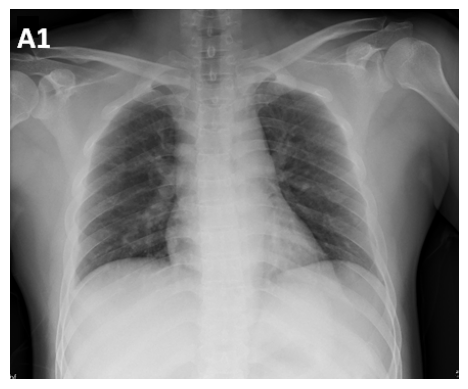

In [8]:
from PIL import Image
import matplotlib.pyplot as plt

target_dir = dirs['train_covid_dir']

first_image = os.listdir(target_dir)[0]
first_image_path = os.path.join(target_dir,first_image)
img = Image.open(first_image_path)

#les caracteristiques de l'imges
print(f"les dimensions des images sont : {img.size}")

# affichage de l'image
plt.imshow(img)
plt.axis("off")
plt.show()

## creation de l'architecture du reseau

In [9]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

# Chargement du modèle MobileNetV2 pré-entraîné sans la couche fully-connected finale
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Ajout des nouvelles couches pour notre problème de classification
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Réduit la dimensionnalité sans créer trop de paramètres
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

# Création du modèle final
model_tl = Model(inputs=base_model.input, outputs=predictions)

# On fige les couches de base pour commencer
for layer in base_model.layers:
    layer.trainable = False

# Compilation du modèle
model_tl.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_tl.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,422,468 (9.24 MB)

 Trainable params: 164,484 (642.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

### Pretaitement des données

Found 270 images belonging to 4 classes.
Found 36 images belonging to 4 classes.


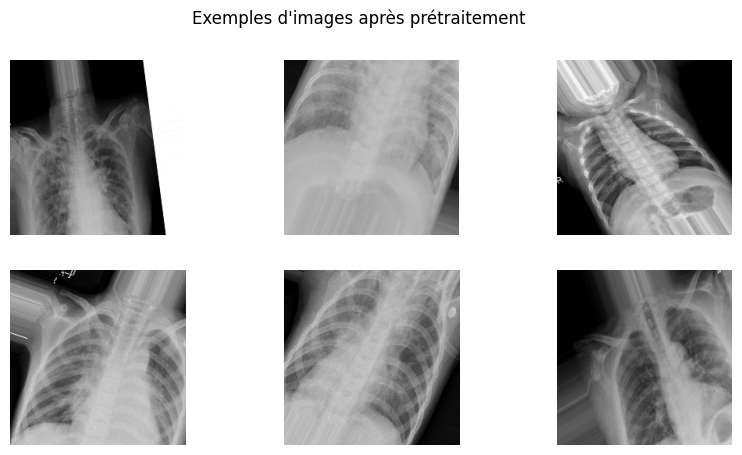

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Définition des répertoires
base_dir = '/home/tchinda/Python_env_code/venv/traitement _image/Covid_Data_GradientCrescent/all'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Générateur pour l'entraînement avec augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Générateur pour les tests : seule la normalisation
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Générateur d'images pour l'entraînement
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical'
)

# Générateur d'images pour le test
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical'
)

# Affichage d'un échantillon d'images prétraitées
sample_batch, _ = next(train_generator)
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(sample_batch[i])
    plt.axis("off")
plt.suptitle("Exemples d'images après prétraitement")
plt.show()

In [11]:
# Vous pouvez ensuite entraîner ce modèle de la même manière en utilisant vos générateurs d'images :
history_tl = model_tl.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,  # Par exemple 50 epochs, puis éventuellement dégeler certaines couches
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

# Sauvegarde
model_tl.save('covid_pneumonia_model_tl.h5')

/home/tchinda/Python_env_code/venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 15s 750ms/step - accuracy: 0.3311 - loss: 1.6648 - val_accuracy: 0.6667 - val_loss: 0.9911
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 580ms/step - accuracy: 0.5449 - loss: 0.9739 - val_accuracy: 0.6389 - val_loss: 0.8099
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 594ms/step - accuracy: 0.6139 - loss: 0.8287 - val_accuracy: 0.6111 - val_loss: 0.9628
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 562ms/step - accuracy: 0.7026 - loss: 0.7655 - val_accuracy: 0.6389 - val_loss: 0.8072
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 571ms/step - accuracy: 0.6607 - loss: 0.7746 - val_accuracy: 0.6111 - val_loss: 0.7135
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 574ms/step - accuracy: 0.7442 - loss: 0.6130 - val_accuracy: 0.7222 - val_loss: 0.6762
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 565ms/step - accuracy: 0.7042 - loss: 0.6655 - val_accuracy: 0.6944 - val_loss: 0.6064
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 562ms/step - accuracy: 0.8024 - loss: 0.5052 - val_accuracy: 0

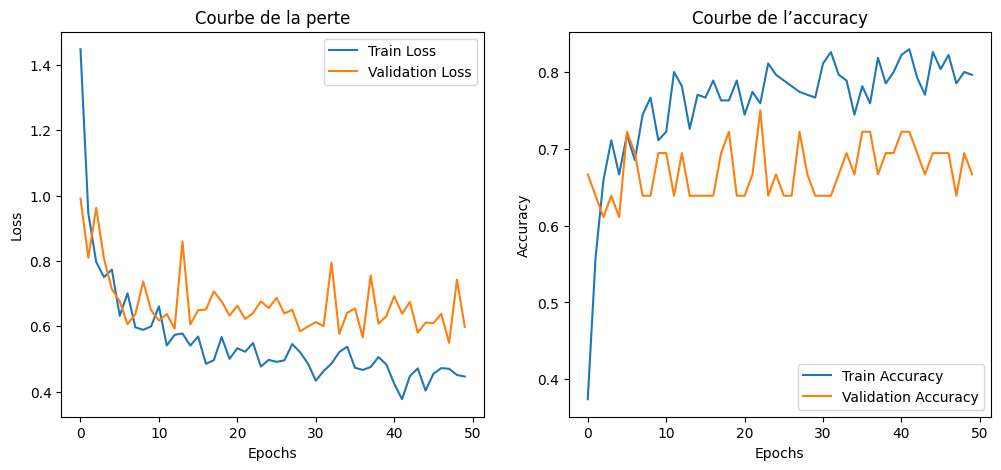

In [13]:
# Affichage des courbes d'entraînement
plt.figure(figsize=(12, 5))

# Courbe de la perte
plt.subplot(1, 2, 1)
plt.plot(history_tl.history['loss'], label='Train Loss')
plt.plot(history_tl.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Courbe de la perte')
plt.legend()

# Courbe de l'accuracy
plt.subplot(1, 2, 2)
plt.plot(history_tl.history['accuracy'], label='Train Accuracy')
plt.plot(history_tl.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Courbe de l’accuracy')
plt.legend()

plt.show()

In [14]:
# Évaluation sur le jeu de test
loss, accuracy = model_tl.evaluate(test_generator)
print("📊 Résultats du modèle sur l’ensemble de test :")
print(f"   Loss (perte) : {loss:.4f}")
print(f"   Accuracy : {accuracy:.4f} (soit {accuracy*100:.2f}%)")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 309ms/step - accuracy: 0.7111 - loss: 0.5218
📊 Résultats du modèle sur l’ensemble de test :
   Loss (perte) : 0.5980
   Accuracy : 0.6667 (soit 66.67%)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 979ms/step
L’image est classée comme : PNEUMONIA_BAC


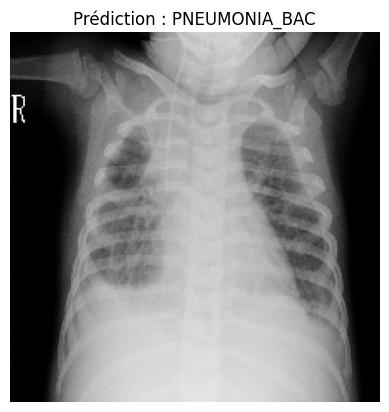

In [15]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import load_model

# Exemple de prédiction sur une image
# Chemin vers une image test (à adapter selon votre environnement)
image_path = "/home/tchinda/Python_env_code/venv/traitement _image/Covid_Data_GradientCrescent/all/train/pneumonia_bac/person1935_bacteria_4850.jpeg"
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalisation

predictions = model_tl.predict(img_array)

# Les classes doivent être dans le même ordre que celles générées par flow_from_directory
classes = ["COVID", "NORMAL", "PNEUMONIA_BAC", "PNEUMONIA_VIR"]
predicted_class = classes[np.argmax(predictions)]
print(f"L’image est classée comme : {predicted_class}")

plt.imshow(img)
plt.title(f"Prédiction : {predicted_class}")
plt.axis("off")
plt.show()